# Filters with Fourier Transform

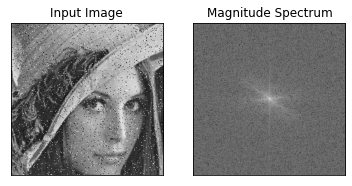

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


#img = cv2.imread('noisy.png',0)
img = cv2.imread('noisy_lena.png',0)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()         

En esta sección, crearemos un Filtro de paso bajo (low pass filter) LPF para eliminar contenidos de alta frecuencia en la imagen. En otras palabras, vamos a aplicar LPF a la imagen que tiene un efecto suavizado (se aprecia como desenfoque).

Hemos seleccionado un rango r de +-50 unidades para el paso del filtro

# LOW PASS FILTER

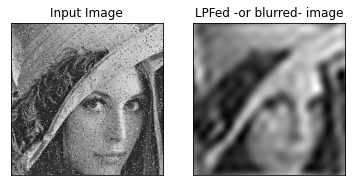

In [2]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 10
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r:crow+r, ccol-r:ccol+r] = 1

#aplica filtro / mask
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('LPFed -or blurred- image'), plt.xticks([]), plt.yticks([])

plt.show()    

# HIGH PASS FILTER

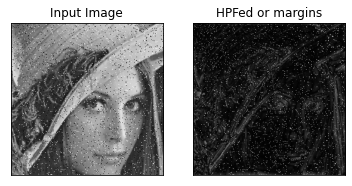

In [3]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 10
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-r-1:crow+r, ccol-r-1:ccol+r] = 1
mask=np.logical_not(mask)
#aplica filtro / mask
fshift2 = dft_shift*mask
f_ishift2 = np.fft.ifftshift(fshift2)
img_back2 = cv2.idft(f_ishift2)
img_back2 = cv2.magnitude(img_back2[:,:,1],img_back2[:,:,0])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back2, cmap = 'gray')
plt.title('HPFed or margins'), plt.xticks([]), plt.yticks([])

plt.show() 

# Confirmation

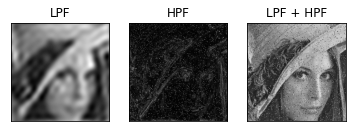

In [4]:
f_ishift3=f_ishift2+f_ishift
img_back3 = cv2.idft(f_ishift3)
img_back3 = cv2.magnitude(img_back3[:,:,1],img_back3[:,:,0])



plt.subplot(131),plt.imshow(img_back, cmap = 'gray')
plt.title('LPF'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back2, cmap = 'gray')
plt.title('HPF'), plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(img_back3, cmap = 'gray')
plt.title('LPF + HPF'), plt.xticks([]), plt.yticks([])

plt.show() 

# BAND PASS FILTER

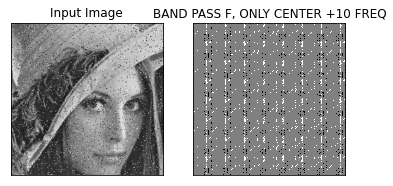

In [5]:
rows, cols = img.shape
crow, ccol = int(rows/2) , int(cols/2)     # center

#crea máscara mask, con 0 y 1 (cero para las frecuencias que no pasan el filtro)
r = 10
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow+r,ccol+r] = 1

#aplica filtro / mask
fshift4 = dft_shift*mask
f_ishift4 = np.fft.ifftshift(fshift4)
img_back4 = cv2.idft(f_ishift4)
img_back4 = cv2.magnitude(img_back4[:,:,1],img_back4[:,:,0])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back4, cmap = 'gray')
plt.title('BAND PASS F, ONLY CENTER +10 FREQ'), plt.xticks([]), plt.yticks([])

plt.show() 

# PATTERNS IN FREQUENCY DOMAIN

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

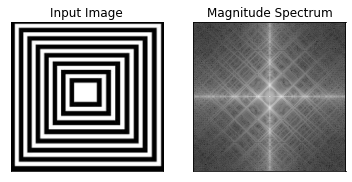

In [9]:
test1 = cv2.imread('test_im_1.png',0)

test1_float32 = np.float32(test1)

test1_dft = cv2.dft(test1_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

#Para centralizar el espectro
test1_dft_shift = np.fft.fftshift(test1_dft)

test1_magnitude_spectrum = 20*np.log(cv2.magnitude(test1_dft_shift[:,:,0],test1_dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(test1, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test1_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Magnitude Spectrum'), ([], []), ([], []))

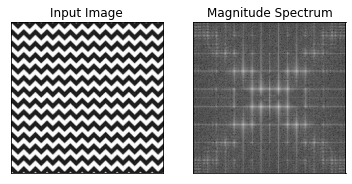

In [7]:
test2 = cv2.imread('test_im_2.png',0)

test2_float32 = np.float32(test2)

test2_dft = cv2.dft(test2_float32, flags = cv2.DFT_COMPLEX_OUTPUT)

#Para centralizar el espectro
test2_dft_shift = np.fft.fftshift(test2_dft)

test2_magnitude_spectrum = 20*np.log(cv2.magnitude(test2_dft_shift[:,:,0],test2_dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(test2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test2_magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

## Rafael Andrade, José Luis Lobera and José Miguel De la Mora